In [43]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
import pandas as pd

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [6]:
df = pd.read_csv("C:/박규영/축구포트폴리오/2023K리그데이터포털/전처리/2023_K리그_데이터최종본.csv", encoding='cp949')

In [7]:
df.columns

Index(['선수명', '포지션', '상세 포지션', '신장', '생년월일', '구단', '번호', '리그', '출전시간', '득점',
       '도움', '슈팅', '유효슈팅', '차단된 슈팅', '벗어난 슈팅', 'PA내 슈팅', 'PA 외 슈팅', '오프사이드',
       '프리킥', '코너킥', '스로인', '드리블시도', '드리블성공', '키패스', '전방패스 시도', '전방패스성공',
       '후방패스시도', '후방패스성공', '횡패스성공', '공격지역패스시도', '공격지역패스성공', '수비지역패스시도',
       '수비지역패스성공', '롱패스시도', '롱패스성공', '중거리패스시도', '중거리패스성공', '숏패스시도', '숏패스성공',
       '크로스시도', '크로스성공', '탈압박', '경합지상시도', '경합지상성공', '경합공중시도', '경합공중성공', '태클시도',
       '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울', '피파울', '경고',
       '퇴장'],
      dtype='object')

In [51]:
param_kor = ['득점','도움', '슈팅', '유효슈팅', 'PA내 슈팅', 'PA 외 슈팅', '드리블시도', 
             '드리블성공', '키패스', '전방패스성공','크로스성공','경합공중성공']

params = ["goal", "assist", "shot", "shots on target", "shot in pa",
          "out of pa shooting", "try to dribble", "dribble succ",
          "key pass", "aerial success", "forward pass succ", "cross succ"]

In [65]:
# 선제조건, 출전시간이 500분 이상이고, 공격수인 선수들 

fw = df[(df['출전시간'] >= 500) & (df['포지션'] == 'FW')]

# 각 컬럼별 최솟값과 최대값 구하기

min_values = fw[param_kor].min()
max_values = fw[param_kor].max()

print("각 컬럼별 최솟값:")
print(min_values)

print("\n각 컬럼별 최댓값:")
print(max_values)

각 컬럼별 최솟값:
득점          0
도움          0
슈팅          5
유효슈팅        1
PA내 슈팅      3
PA 외 슈팅     0
드리블시도       1
드리블성공       0
키패스         1
전방패스성공     12
크로스성공       0
경합공중성공      1
dtype: int64

각 컬럼별 최댓값:
득점          11
도움           7
슈팅          58
유효슈팅        25
PA내 슈팅      44
PA 외 슈팅     33
드리블시도       50
드리블성공       26
키패스         48
전방패스성공     179
크로스성공       45
경합공중성공     186
dtype: int64


In [66]:
# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 5, 1, 3,  0, 1, 0, 1, 12, 0, 1] # 레이더의 최솟값
high = [11, 8, 61, 29, 44, 41, 52, 26, 48, 725, 45, 186] # 레이더의 최댓값

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [67]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              ring_width=1, center_circle_radius=1)

In [68]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [54]:
ju = df[df['선수명'] == '주민규']
ju = ju[param_kor]
ju = ju.values

ba = df[df['선수명'] == '바코']
ba = ba[param_kor]
ba = ba.values

na = df[df['선수명'] == '나상호']
na = na[param_kor]
na = na.values

In [57]:
print(ju)
print(na)

[[11  1 47 23 41  6  2  1 10 45  0 52]]
[[11  3 49 16 26 23 50 14 29 95 17 20]]


In [69]:
ju = [11,1,47,23,41,6,2,1,10,45,0,52]
na = [11,3,49,16,26,23,50,14,29,95,17,20]

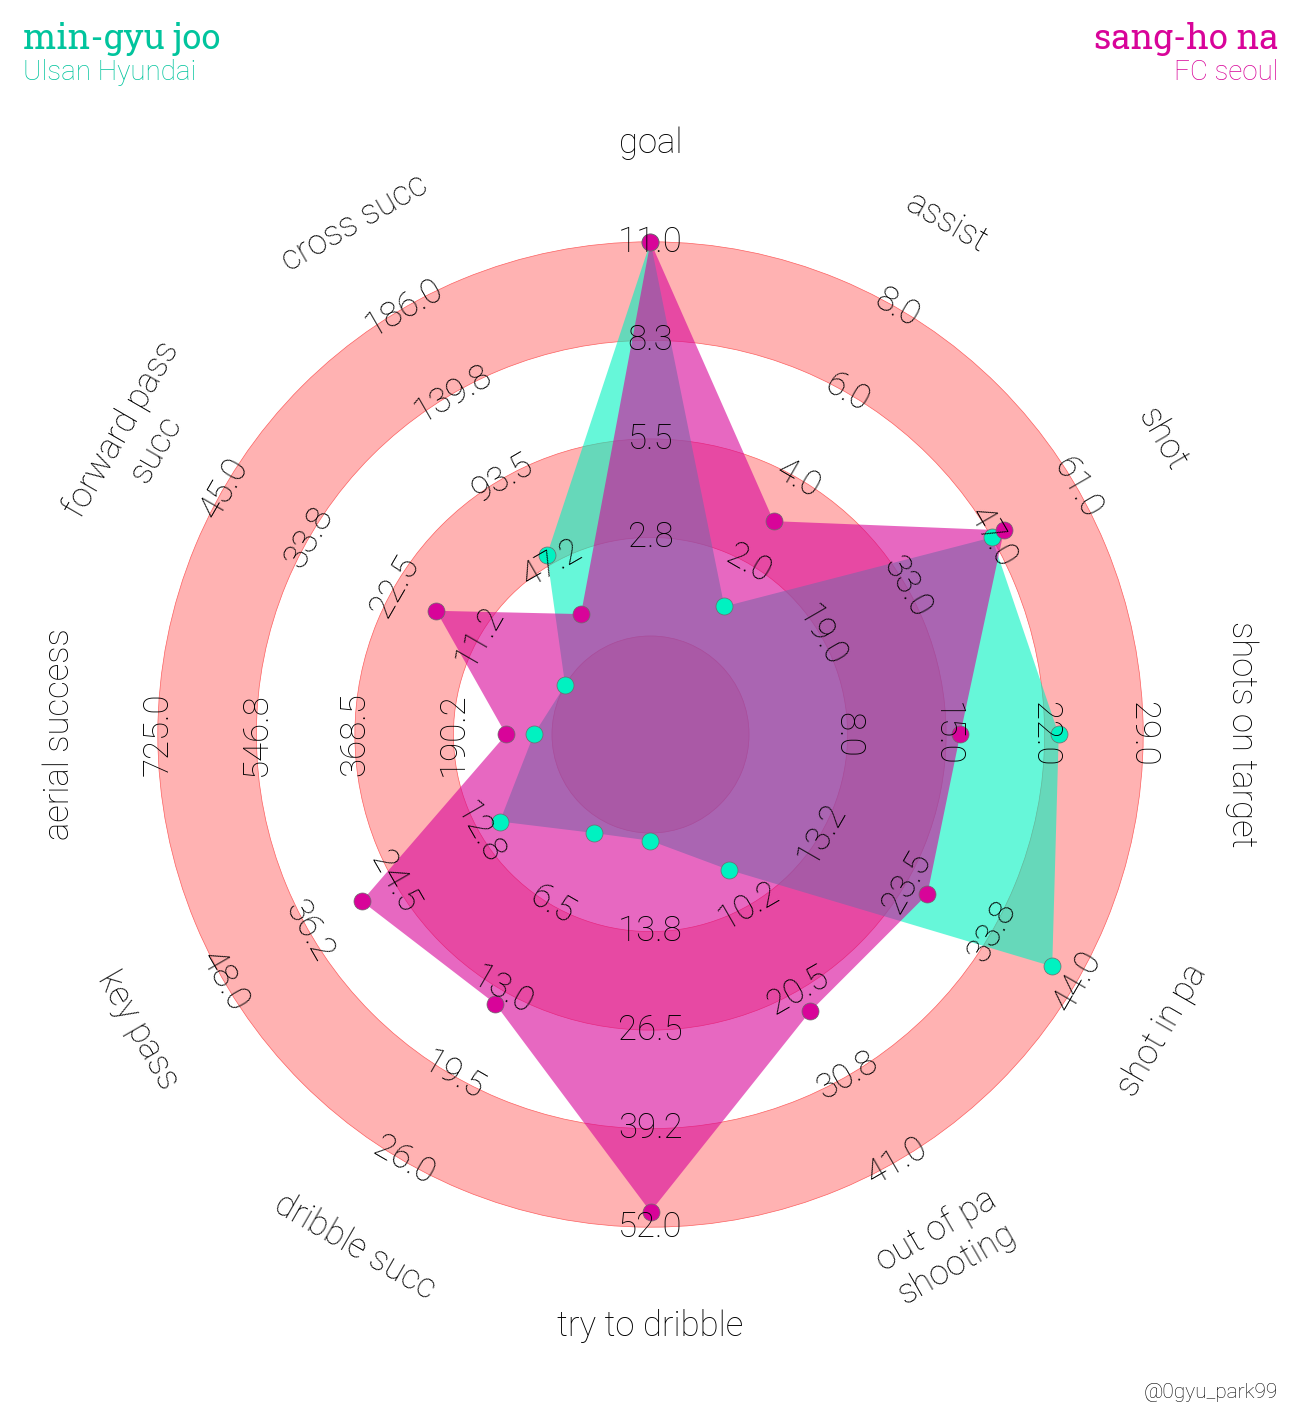

In [71]:
# creating the figure using the grid function from mplsoccer:

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(ju, na, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})

radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)

endnote_text = axs['endnote'].text(0.99, 0.5, '@0gyu_park99', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')

title1_text = axs['title'].text(0.01, 0.65, 'min-gyu joo', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.25, 'Ulsan Hyundai', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')

title3_text = axs['title'].text(0.99, 0.65, 'sang-ho na', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')

title4_text = axs['title'].text(0.99, 0.25, 'FC seoul', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')